# Machine Learning : Feature Space 

Using Feature Space with Breast Cancer dataset 

What is feature space? - Feature space is a numeric representation of raw data 
"Feature vector is a n-dimensional vector of numerical features that represnets some object - vector space associated with these vectors is often called the feature space"

### Title: Wisconsin Breast Cancer Database (January 8, 1991)

This database is used to try and predict wheter a tumor is malignant or benign, the following database consists of the measurements of the tumor and the nature of the tumour. 

Diagnosis has 2 fields B=Benign, M=Malignant

4. Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/

5. Number of instances: 569 

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

8. Missing attribute values: none

9. Class distribution: 357 benign, 212 malignant



In [18]:
#import prelimminaries 

import numpy as np 
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [19]:
#transfer into numpy
X = np.array(df.loc[:, 2:].values)
y = np.array(df.loc[:, 1].values) # class label is contained here

In [20]:
y[y == 'M'] = 1 # Malignant
y[y == 'B'] = 0 # Benign
y.astype(int) #typecast



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [21]:
#Class Distribution of the data (mean, sd and variance)
np.mean(y), np.std(y), np.var(y)

(0.37258347978910367, 0.48349253394167957, 0.2337650303773462)

### Plot 2 Features and scatter plot

1)ID number 
2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of how these features are computed.

The mean, standard error, and "worst" or largest (mean of the three largest values) of these
features were computed for each image, resulting in 30 features. For instance, field 3 is Mean
Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [22]:
#get some features of the tumour, indexing starts with 0
feature1 = np.array(df.loc[:, 2].values) #mean radius
feature2 = np.array(df.loc[:, 3].values) #mean texture
feature3 = np.array(df.loc[:, 5].values) #mean area

In [23]:
feature1

array([ 17.99 ,  20.57 ,  19.69 ,  11.42 ,  20.29 ,  12.45 ,  18.25 ,
        13.71 ,  13.   ,  12.46 ,  16.02 ,  15.78 ,  19.17 ,  15.85 ,
        13.73 ,  14.54 ,  14.68 ,  16.13 ,  19.81 ,  13.54 ,  13.08 ,
         9.504,  15.34 ,  21.16 ,  16.65 ,  17.14 ,  14.58 ,  18.61 ,
        15.3  ,  17.57 ,  18.63 ,  11.84 ,  17.02 ,  19.27 ,  16.13 ,
        16.74 ,  14.25 ,  13.03 ,  14.99 ,  13.48 ,  13.44 ,  10.95 ,
        19.07 ,  13.28 ,  13.17 ,  18.65 ,   8.196,  13.17 ,  12.05 ,
        13.49 ,  11.76 ,  13.64 ,  11.94 ,  18.22 ,  15.1  ,  11.52 ,
        19.21 ,  14.71 ,  13.05 ,   8.618,  10.17 ,   8.598,  14.25 ,
         9.173,  12.68 ,  14.78 ,   9.465,  11.31 ,   9.029,  12.78 ,
        18.94 ,   8.888,  17.2  ,  13.8  ,  12.31 ,  16.07 ,  13.53 ,
        18.05 ,  20.18 ,  12.86 ,  11.45 ,  13.34 ,  25.22 ,  19.1  ,
        12.   ,  18.46 ,  14.48 ,  19.02 ,  12.36 ,  14.64 ,  14.62 ,
        15.37 ,  13.27 ,  13.45 ,  15.06 ,  20.26 ,  12.18 ,   9.787,
        11.6  ,  14.

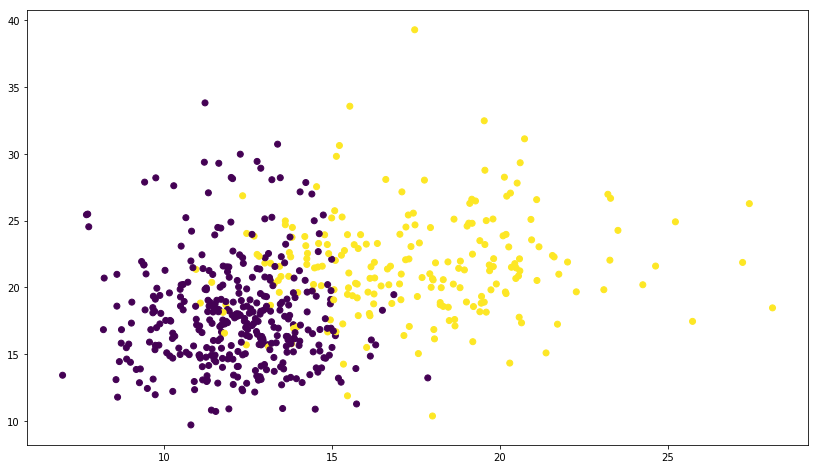

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(feature1, feature2, c=y) # plot the feature space with color coded classes

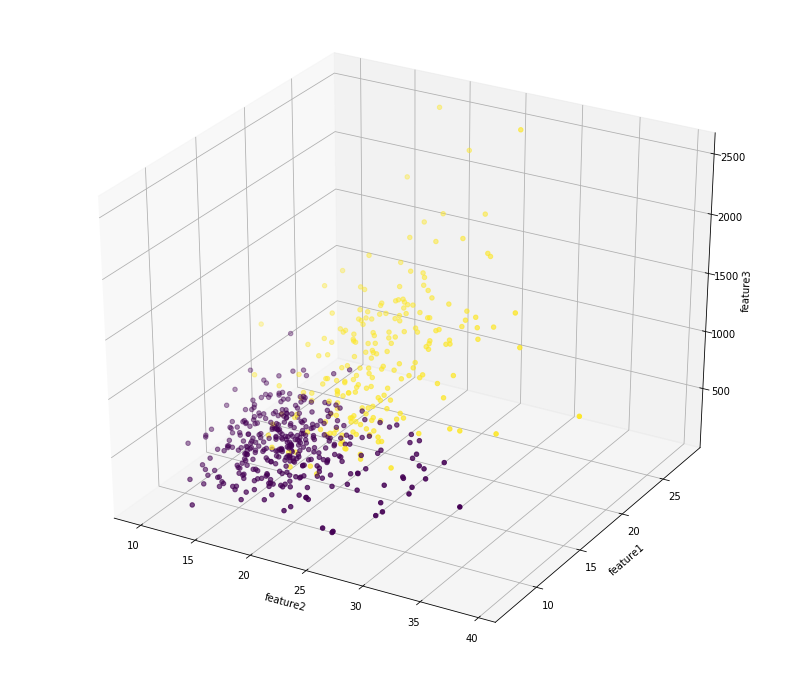

In [26]:
#Plot three features in 3D

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature2, feature1, feature3, c=y)
ax.set_xlabel('feature2')
ax.set_ylabel('feature1')
ax.set_zlabel('feature3')

plt.show()

## Loading the pima indians diabetes dataset

In [27]:
%matplotlib inline 


The diagnostic, binary-valued variable investigated is whether the patient shows signs of diabetes according to World Health Organization criteria (i.e., if the 2 hour post-load plasma glucose was at least 200 mg/dl at any survey  examination or if found during routine medical care). The population lives near Phoenix, Arizona, USA.
       
In particular, all patients here are females at least 21 years old of Pima Indian heritage.
      
      
For Each Attribute: (all numeric-valued)

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

Class Distribution: (class value 1 is interpreted as "tested positive for diabetes") 

In [28]:
#suppress warning 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [29]:
# import required stuff
import numpy as np 
import pandas as pd

In [30]:
import pandas as pd
columns = ['n_preg', 'glucose', 'diastolic_bp', 'thickness',
           'insulin', 'bmi', 'pedigree', 'age', 'class']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', header=None, names=columns)


#### Exploratory Data Analysis

In [31]:
df.head(5)

,n_preg,glucose,diastolic_bp,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
# some simple descriptive statistics 
df.describe()

,n_preg,glucose,diastolic_bp,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### IMPUTATION

In [33]:
# value 0 corresponds to missing value and needs to be imputed

cols = ['n_preg', 'glucose', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'pedigree', 'age']
for col in cols:
    print (col, df[df[col]==0].shape)

n_preg (111, 9)
glucose (5, 9)
diastolic_bp (35, 9)
thickness (227, 9)
insulin (374, 9)
bmi (11, 9)
pedigree (0, 9)
age (0, 9)


In [34]:
# replace zero value with mean of its corresponding class
for col in cols:
    mean0 = df.loc[df[col]!=0, [col, 'class']].groupby('class').mean().iloc[0,0]
    mean1 = df.loc[df[col]!=0, [col, 'class']].groupby('class').mean().iloc[1,0]
    df.loc[(df[col]==0) & (df['class']==0), col] = mean0
    df.loc[(df[col]==0) & (df['class']==1), col] = mean1

In [35]:
# read the imputed data
df.head(10)

,n_preg,glucose,diastolic_bp,thickness,insulin,bmi,pedigree,age,class
0,6.000000,148.0,72.000000,35.000000,206.846154,33.600000,0.627,50.0,1
1,1.000000,85.0,66.000000,29.000000,130.287879,26.600000,0.351,31.0,0
2,8.000000,183.0,64.000000,33.000000,206.846154,23.300000,0.672,32.0,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0
4,5.669565,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1
5,5.000000,116.0,74.000000,27.235457,130.287879,25.600000,0.201,30.0,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1
7,10.000000,115.0,70.877339,27.235457,130.287879,35.300000,0.134,29.0,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1
9,8.000000,125.0,96.000000,33.000000,206.846154,35.406767,0.232,54.0,1


### Exploring relations

Text(0.5,1,'Correlation Matrix for Pima Diabetes Data')

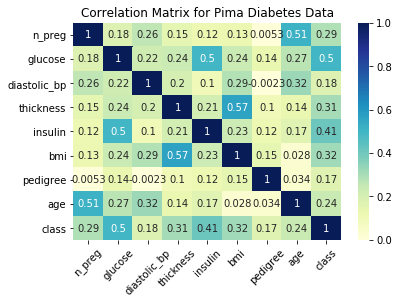

In [36]:
# we want to see the correlation between pairs of variables
# a basis for feature selection
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.title('Correlation Matrix for Pima Diabetes Data')

### Exploring Feature Space 

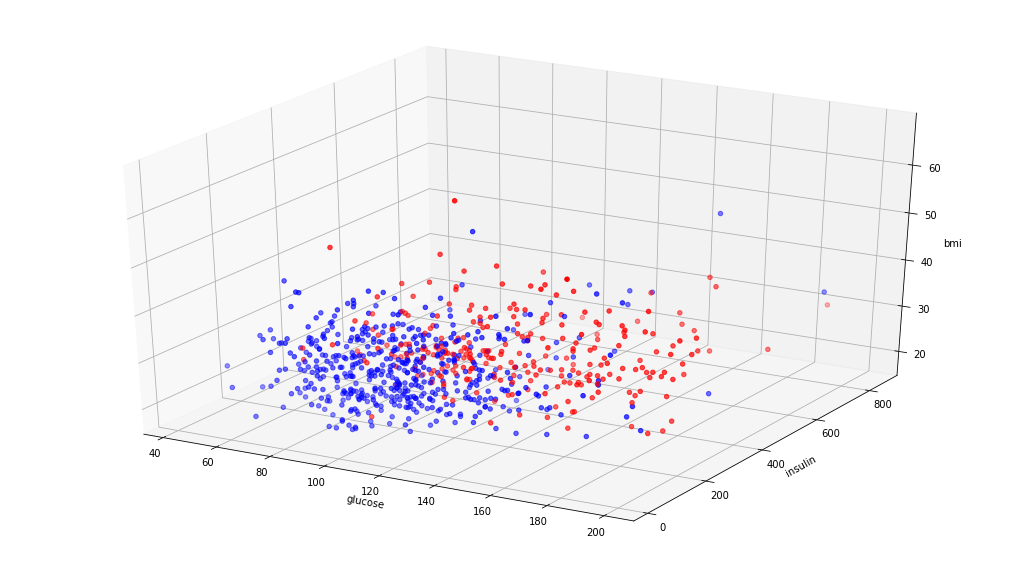

In [37]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

feature1 = df['glucose'].values
feature2 = df['insulin'].values 
feature3 = df['bmi'].values

df['class']=df['class'].astype('str')

c = df['class'].values
df['class']=df['class'].astype('int')
c[c=='0'] = 'b' #negative diagnosis diabetes
c[c=='1'] = 'r' #positive diagnosis diabetes

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('glucose')
ax.set_ylabel('insulin')
ax.set_zlabel('bmi')

plt.show()